In [2]:
import mne

# Understanding mne

In order to read the EEG files, the module [mne](https://mne.tools/dev/index.html) was used. The original data is in a format native to EEGLAB, MATLab package. In order to understand more about the data type, we refered to [Overview of MEG/EEG analysis with MNE-Python](https://mne.tools/dev/auto_tutorials/intro/10_overview.html), with a more hands-on introduction.

In [4]:
eeglab = mne.io.read_raw_eeglab("..\data\ds004902-download\sub-54\ses-1\eeg\sub-54_ses-1_task-eyesopen_eeg.set")

Reading d:\2024-2-P1-sleep-deprivation-classification\notebooks\..\data\ds004902-download\sub-54\ses-1\eeg\sub-54_ses-1_task-eyesopen_eeg.fdt


<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\beama\AppData\Local\Temp\ipykernel_23848\4206241873.py:1: SyntaxWarning: invalid escape sequence '\d'
  eeglab = mne.io.read_raw_eeglab("..\data\ds004902-download\sub-54\ses-1\eeg\sub-54_ses-1_task-eyesopen_eeg.set")


In [5]:
eeglab.info

Measurement date,Unknown
Experimenter,Unknown
Participant,Unknown
Digitized points,61 points
Good channels,61 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,500.00 Hz
Highpass,0.00 Hz
Lowpass,250.00 Hz


In [6]:
eeglab.ch_names

['Fp1',
 'AF3',
 'AF7',
 'Fz',
 'F1',
 'F3',
 'F5',
 'F7',
 'FC1',
 'FC3',
 'FC5',
 'FT7',
 'Cz',
 'C1',
 'C3',
 'C5',
 'T7',
 'CP1',
 'CP3',
 'CP5',
 'TP7',
 'TP9',
 'Pz',
 'P1',
 'P3',
 'P5',
 'P7',
 'PO3',
 'PO7',
 'Oz',
 'O1',
 'Fpz',
 'Fp2',
 'AF4',
 'AF8',
 'F2',
 'F4',
 'F6',
 'F8',
 'FC2',
 'FC4',
 'FC6',
 'FT8',
 'C2',
 'C4',
 'C6',
 'T8',
 'CPz',
 'CP2',
 'CP4',
 'CP6',
 'TP8',
 'TP10',
 'P2',
 'P4',
 'P6',
 'P8',
 'POz',
 'PO4',
 'PO8',
 'O2']

In [7]:
eeglab.n_times

150000

In [8]:
eeglab.times

array([0.00000e+00, 2.00000e-03, 4.00000e-03, ..., 2.99994e+02,
       2.99996e+02, 2.99998e+02])

In [9]:
assert eeglab.n_times == len(eeglab.times)

In [10]:
print("The limits to the data are from", eeglab.times[0], "to", eeglab.times[-1])
print("There are", eeglab.n_times, "timepoints in the data")

The limits to the data are from 0.0 to 299.998
There are 150000 timepoints in the data


In [11]:
eeglab.preload

False

In [12]:
eeglab.load_data()

Reading 0 ... 149999  =      0.000 ...   299.998 secs...


Measurement date,Unknown
Experimenter,Unknown
Participant,Unknown
Digitized points,61 points
Good channels,61 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,500.00 Hz
Highpass,0.00 Hz
Lowpass,250.00 Hz


In [13]:
eeglab.preload

True

Effective window size : 4.096 (s)
Plotting amplitude spectral density (dB=True).
Effective window size : 4.096 (s)


C:\Users\beama\AppData\Local\Temp\ipykernel_23848\3702515666.py:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  eeglab.compute_psd(fmax=250).plot(picks="data", exclude="bads", amplitude=True)
d:\2024-2-P1-sleep-deprivation-classification\venv\Lib\site-packages\mne\viz\utils.py:167: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


Plotting power spectral density (dB=True).
Using matplotlib as 2D backend.


C:\Users\beama\AppData\Local\Temp\ipykernel_23848\3702515666.py:2: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  eeglab.compute_psd(fmax=250).plot(picks="data", exclude="bads", amplitude=False)
d:\2024-2-P1-sleep-deprivation-classification\venv\Lib\site-packages\mne\viz\utils.py:167: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


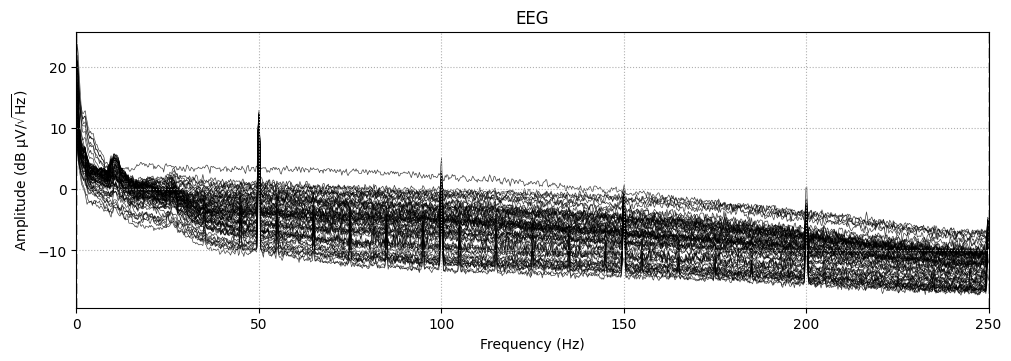

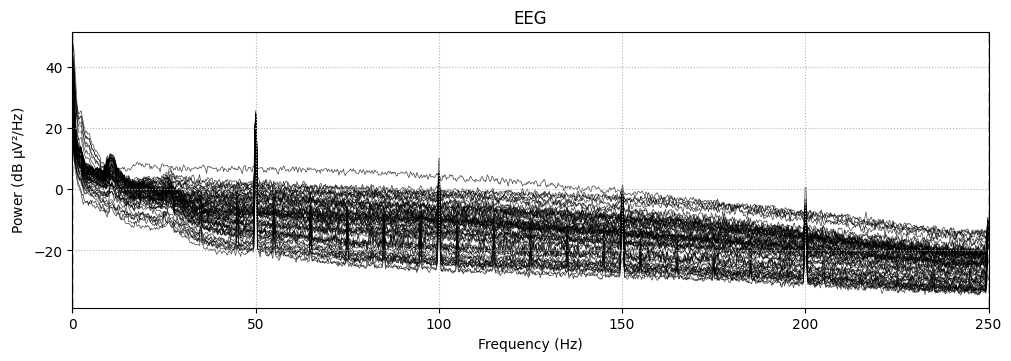

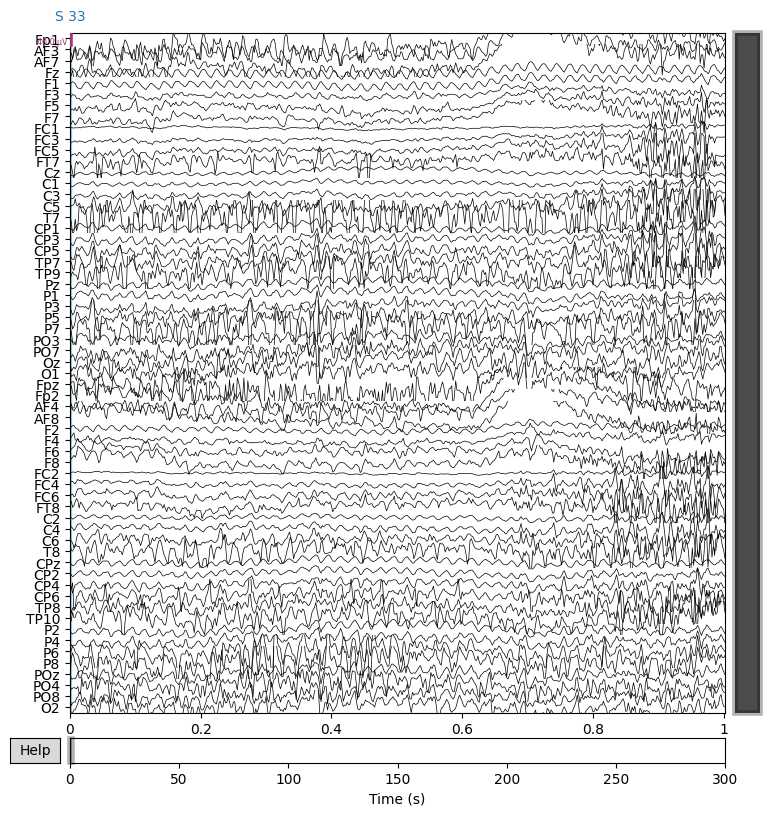

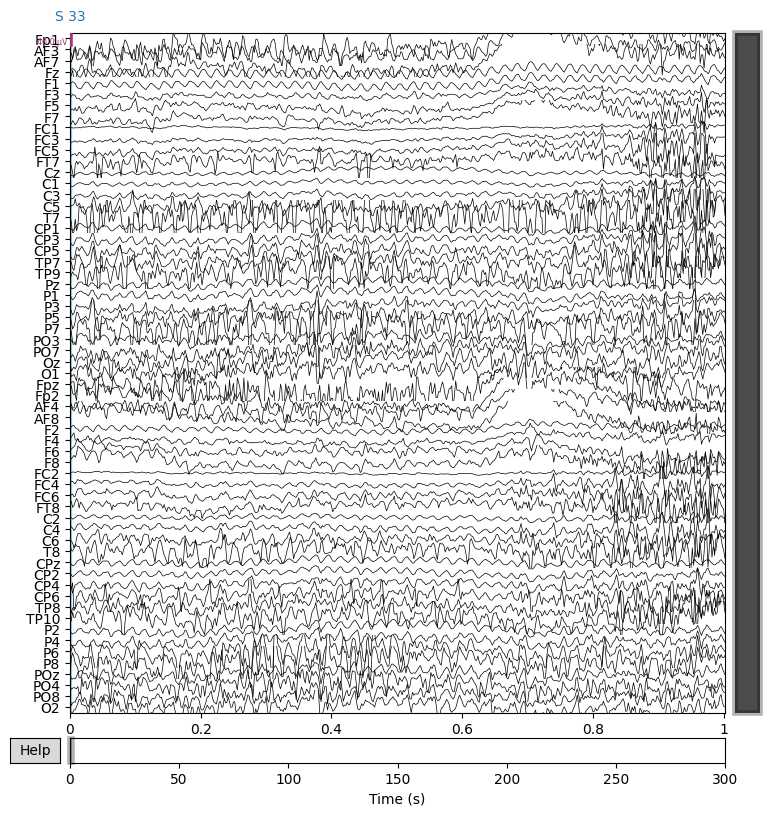

In [14]:
eeglab.compute_psd(fmax=250).plot(picks="data", exclude="bads", amplitude=True)
eeglab.compute_psd(fmax=250).plot(picks="data", exclude="bads", amplitude=False)

eeglab.plot(duration=1, n_channels=61)

## Channels

In [19]:
print(f"There are {len(eeglab.ch_names)} channels. These channels represent the electrodes positioneds on the head of the participant.\nIn order to know the position of each electrode, we can use the function eeglab.plot_sensors()")

There are 61 channels. These channels represent the electrodes positioneds on the head of the participant.
In order to know the position of each electrode, we can use the function eeglab.plot_sensors()


In [27]:
builtin_montages = mne.channels.get_builtin_montages(descriptions=True)
print("There are", len(builtin_montages), "builtin montages available in MNE-Python")
for montage_name, montage_description in builtin_montages:
    print(f"\t- {montage_name}: {montage_description}")
print(f"We will be using the 'standard_1020' montage for this dataset, due to the fact that it was used in the original publication")

There are 28 builtin montages available in MNE-Python
	- standard_1005: Electrodes are named and positioned according to the international 10-05 system (343+3 locations)
	- standard_1020: Electrodes are named and positioned according to the international 10-20 system (94+3 locations)
	- standard_alphabetic: Electrodes are named with LETTER-NUMBER combinations (A1, B2, F4, …) (65+3 locations)
	- standard_postfixed: Electrodes are named according to the international 10-20 system using postfixes for intermediate positions (100+3 locations)
	- standard_prefixed: Electrodes are named according to the international 10-20 system using prefixes for intermediate positions (74+3 locations)
	- standard_primed: Electrodes are named according to the international 10-20 system using prime marks (' and '') for intermediate positions (100+3 locations)
	- biosemi16: BioSemi cap with 16 electrodes (16+3 locations)
	- biosemi32: BioSemi cap with 32 electrodes (32+3 locations)
	- biosemi64: BioSemi cap w

In [42]:
standard_1020_montage = mne.channels.make_standard_montage("standard_1020")
print(standard_1020_montage)

<DigMontage | 0 extras (headshape), 0 HPIs, 3 fiducials, 94 channels>


In [43]:
print(standard_1020_montage.ch_names)

['Fp1', 'Fpz', 'Fp2', 'AF9', 'AF7', 'AF5', 'AF3', 'AF1', 'AFz', 'AF2', 'AF4', 'AF6', 'AF8', 'AF10', 'F9', 'F7', 'F5', 'F3', 'F1', 'Fz', 'F2', 'F4', 'F6', 'F8', 'F10', 'FT9', 'FT7', 'FC5', 'FC3', 'FC1', 'FCz', 'FC2', 'FC4', 'FC6', 'FT8', 'FT10', 'T9', 'T7', 'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6', 'T8', 'T10', 'TP9', 'TP7', 'CP5', 'CP3', 'CP1', 'CPz', 'CP2', 'CP4', 'CP6', 'TP8', 'TP10', 'P9', 'P7', 'P5', 'P3', 'P1', 'Pz', 'P2', 'P4', 'P6', 'P8', 'P10', 'PO9', 'PO7', 'PO5', 'PO3', 'PO1', 'POz', 'PO2', 'PO4', 'PO6', 'PO8', 'PO10', 'O1', 'Oz', 'O2', 'O9', 'Iz', 'O10', 'T3', 'T5', 'T4', 'T6', 'M1', 'M2', 'A1', 'A2']


4 duplicate electrode labels found:
T7/T3, T8/T4, P7/T5, P8/T6
Plotting 90 unique labels.


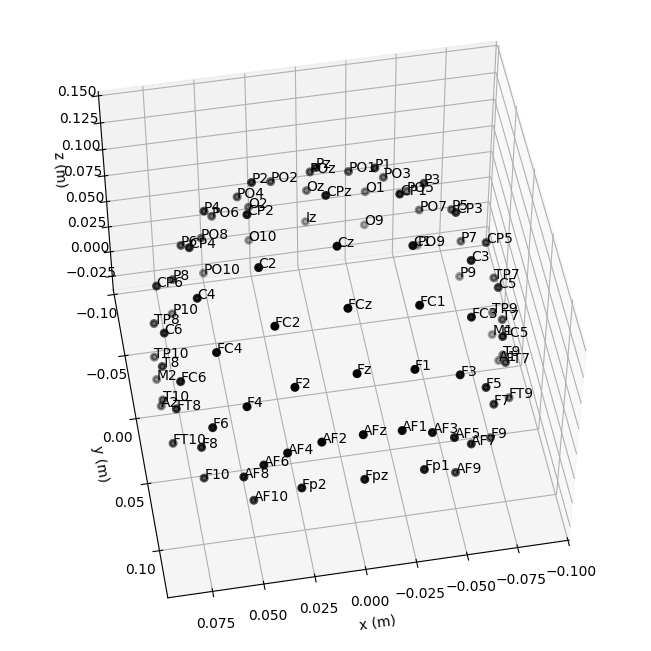

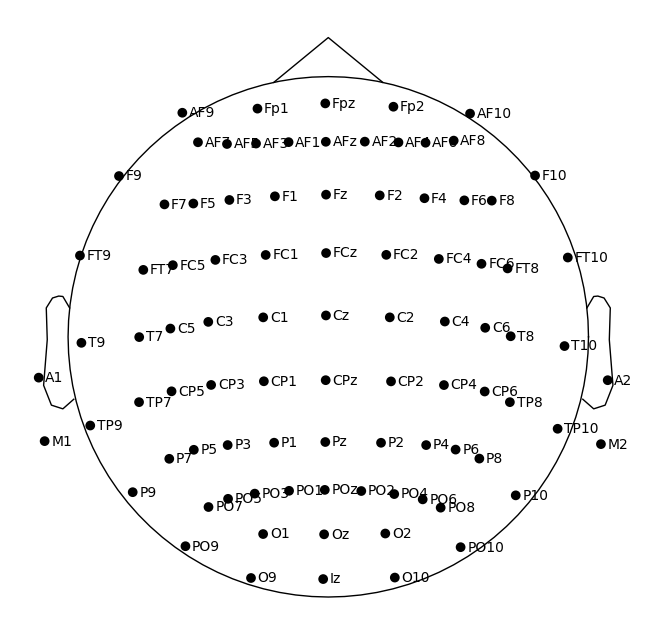

4 duplicate electrode labels found:
T7/T3, T8/T4, P7/T5, P8/T6
Plotting 90 unique labels.


In [91]:
standard_1020_montage.plot(sphere=(0.0, 0.015, 0.0, 0.098))  # 2D
fig = standard_1020_montage.plot(kind="3d", show=False)  # 3D
fig = fig.gca().view_init(azim=80, elev=50)  # set view angle for tutorial

This is only visualization to better understand the EEG cap channels. According to the discussion found on various issues like [#10741](https://github.com/mne-tools/mne-python/issues/10741), there seems to be a debate about realistic proportions and positions vs template.

In [95]:
assert set(eeglab.ch_names) <= set(standard_1020_montage.ch_names)

In [96]:
common_ch_names = list(set(eeglab.ch_names).intersection(standard_1020_montage.ch_names))
common_ch_names.sort()
print(f"The number of channels that are in both the EEG data and the standard_1020 montage is {len(common_ch_names)}")
print(f"The common channels are:", end=" ")
print(*common_ch_names, sep=", ", end=".\n\n")

extra_ch_names = list(set(eeglab.ch_names) - set(standard_1020_montage.ch_names))
extra_ch_names.sort()
print(f"The number of channels that are in the EEG data but not in the standard_1020 montage is {len(extra_ch_names)}")
print(f"The extra channels are:", end=" ")
print(*extra_ch_names, sep=", ", end=".")

The number of channels that are in both the EEG data and the standard_1020 montage is 61
The common channels are: AF3, AF4, AF7, AF8, C1, C2, C3, C4, C5, C6, CP1, CP2, CP3, CP4, CP5, CP6, CPz, Cz, F1, F2, F3, F4, F5, F6, F7, F8, FC1, FC2, FC3, FC4, FC5, FC6, FT7, FT8, Fp1, Fp2, Fpz, Fz, O1, O2, Oz, P1, P2, P3, P4, P5, P6, P7, P8, PO3, PO4, PO7, PO8, POz, Pz, T7, T8, TP10, TP7, TP8, TP9.

The number of channels that are in the EEG data but not in the standard_1020 montage is 0
The extra channels are: .

## Channel data

In [98]:
eeglab

Measurement date,Unknown
Experimenter,Unknown
Participant,Unknown
Digitized points,61 points
Good channels,61 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,500.00 Hz
Highpass,0.00 Hz
Lowpass,250.00 Hz
